## Libraries import + matplotlib preset


In [1]:
import os
import re   
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
# pixel in inches for figsize
px = 1/plt.rcParams['figure.dpi']
# default figsize for all figures
plt.rcParams['figure.figsize'] = [1000*px, 1000*px]

## Crate paths for csv files


In [2]:
CURR_DIR = os.getcwd()
print(CURR_DIR)
data_path = os.path.join(CURR_DIR, 'datasets/Sleeve-textured.csv')

/Users/wszczawinski/Projects/master-thesis/analyses


## Create dataframe from .cvs


In [3]:
df = pd.read_csv(data_path, sep=';', decimal=',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99767 entries, 0 to 99766
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number In Batch  99767 non-null  int64  
 1   Count            99767 non-null  int64  
 2   Time (ms)        99767 non-null  int64  
 3   Timestamp        99767 non-null  object 
 4   Trigger          99767 non-null  object 
 5   obl X            99767 non-null  object 
 6   obl Y            99767 non-null  object 
 7   Odczyt Z         99767 non-null  float64
 8   Odczyt otwor     99767 non-null  object 
 9   Odczyt wal       99767 non-null  object 
 10  Kat obrotu       99767 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 8.4+ MB


## Dropping not relevant columns


In [4]:
df = df.drop(['Number In Batch', 'Time (ms)', 'Timestamp', 'Trigger'], axis = 1)

df


Count   obl X    obl Y  Odczyt Z Odczyt otwor   Odczyt wal  Kat obrotu
0          1  0,2654   0,0000   -37.206       0,2654  Under Range        0.00
1          2  0,2654   0,0000   -37.206       0,2654  Under Range        0.00
2          3  0,2654   0,0000   -37.206       0,2654  Under Range        0.00
3          4  0,2654   0,0000   -37.206       0,2654  Under Range        0.00
4          5  0,2654   0,0000   -37.206       0,2654  Under Range        0.00
...      ...     ...      ...       ...          ...          ...         ...
99762  99763  0,2718  -0,0029     0.070       0,2718  Under Range       -0.61
99763  99764  0,2718  -0,0029     0.070       0,2718  Under Range       -0.61
99764  99765  0,2718  -0,0029     0.070       0,2718  Under Range       -0.61
99765  99766  0,2718  -0,0029     0.070       0,2718  Under Range       -0.61
99766  99767  0,2718  -0,0029     0.070       0,2718  Under Range       -0.61

[99767 rows x 7 columns]

## Removing rows with measurments over and under range of the sensor


In [5]:
for col in ['obl X', 'obl Y']:
    df = df[df[col].str.contains("Over Range")==False]
    df = df[df[col].str.contains("Under Range")==False]
    df[col] = pd.to_numeric(df[col].apply(lambda x: re.sub(',', '.', str(x))))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96275 entries, 0 to 99766
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Count         96275 non-null  int64  
 1   obl X         96275 non-null  float64
 2   obl Y         96275 non-null  float64
 3   Odczyt Z      96275 non-null  float64
 4   Odczyt otwor  96275 non-null  object 
 5   Odczyt wal    96275 non-null  object 
 6   Kat obrotu    96275 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.9+ MB


## Data exploration


In [6]:
df.head(130)

Count   obl X  obl Y  Odczyt Z Odczyt otwor   Odczyt wal  Kat obrotu
0        1  0.2654    0.0   -37.206       0,2654  Under Range         0.0
1        2  0.2654    0.0   -37.206       0,2654  Under Range         0.0
2        3  0.2654    0.0   -37.206       0,2654  Under Range         0.0
3        4  0.2654    0.0   -37.206       0,2654  Under Range         0.0
4        5  0.2654    0.0   -37.206       0,2654  Under Range         0.0
..     ...     ...    ...       ...          ...          ...         ...
125    126  0.2654    0.0   -37.206       0,2654  Under Range         0.0
126    127  0.2654    0.0   -37.206       0,2654  Under Range         0.0
127    128  0.2654    0.0   -37.206       0,2654  Under Range         0.0
128    129  0.2654    0.0   -37.206       0,2654  Under Range         0.0
129    130  0.2654    0.0   -37.206       0,2654  Under Range         0.0

[130 rows x 7 columns]

In [7]:
df.describe()

Count         obl X         obl Y      Odczyt Z    Kat obrotu
count  96275.000000  96275.000000  96275.000000  96275.000000  96275.000000
mean   49973.638525      0.001553     -0.014688    -18.605600   -170.870886
std    28859.936092      0.204323      0.187184     10.970766    108.826376
min        1.000000     -0.354200     -0.592600    -37.206000   -351.580000
25%    24961.500000     -0.198300     -0.190900    -28.316000   -261.430000
50%    49998.000000      0.000800     -0.020600    -18.482000   -168.480000
75%    75012.500000      0.220300      0.153800     -9.022000    -75.170000
max    99767.000000      0.277300      0.295100      0.070000      0.000000

In [8]:
df.corr()

Count     obl X     obl Y  Odczyt Z  Kat obrotu
Count       1.000000  0.016075 -0.004866  0.999955    0.000225
obl X       0.016075  1.000000 -0.037820  0.016276    0.108074
obl Y      -0.004866 -0.037820  1.000000 -0.004794   -0.659976
Odczyt Z    0.999955  0.016276 -0.004794  1.000000    0.000203
Kat obrotu  0.000225  0.108074 -0.659976  0.000203    1.000000

### Single arrays from columns for ploting purposes


In [9]:
x = df['obl X']
y = df['obl Y']
z = df['Odczyt Z']
hole = df['Odczyt otwor']
shaft = df['Odczyt wal']
angle = df['Kat obrotu']
count = df['Count']

### Correlation between X and angle


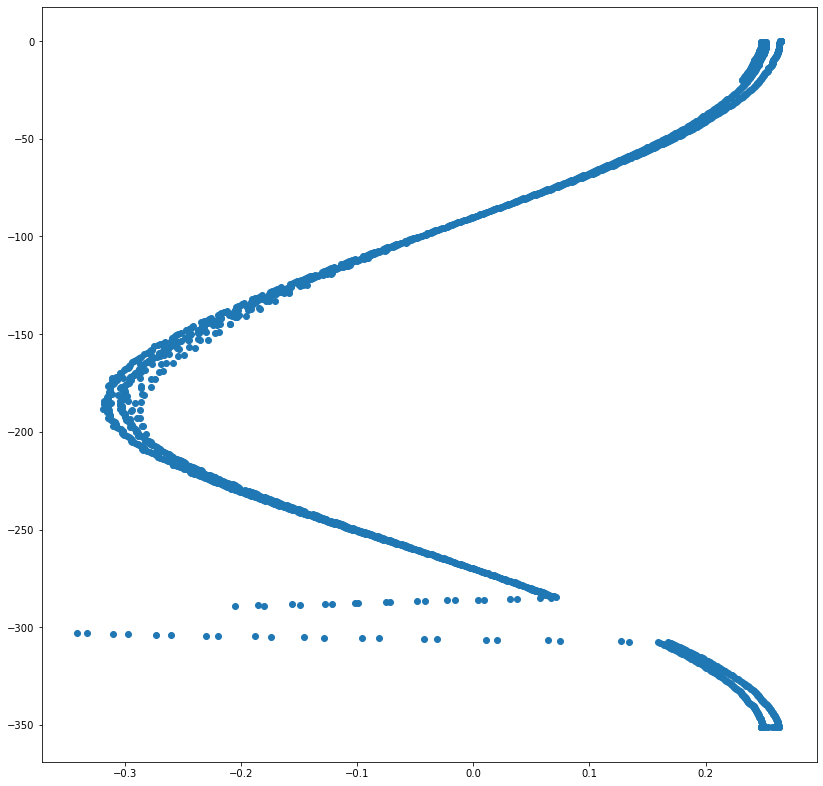

In [10]:
angles = angle[:2000]
xs = x[:2000]
plt.scatter(xs, angles)
plt.show()

array([[<AxesSubplot:title={'center':'Count'}>,
        <AxesSubplot:title={'center':'obl X'}>],
       [<AxesSubplot:title={'center':'obl Y'}>,
        <AxesSubplot:title={'center':'Odczyt Z'}>],
       [<AxesSubplot:title={'center':'Kat obrotu'}>, <AxesSubplot:>]],
      dtype=object)

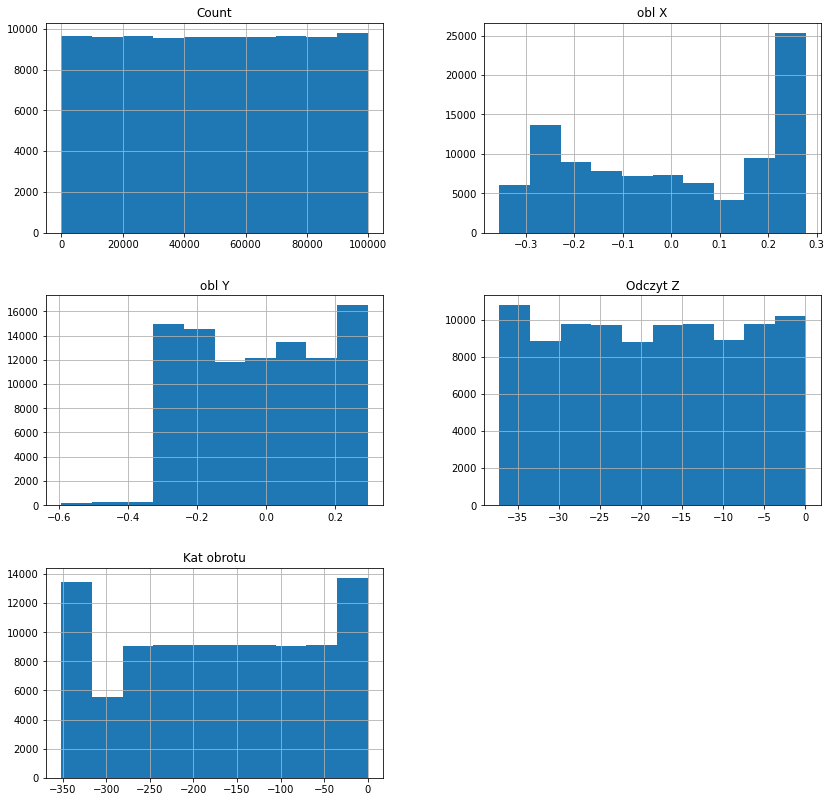

In [11]:
df.hist()

<AxesSubplot:>

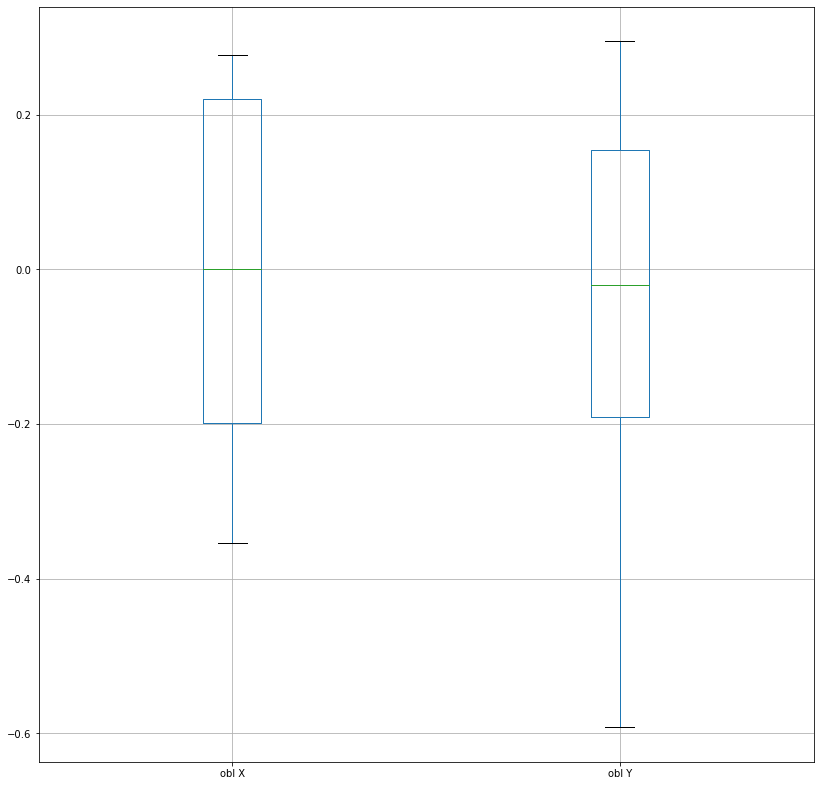

In [12]:
df.boxplot(column=['obl X', 'obl Y'])

Maximum angle value: 
0.0
Minimum angle value: 
-351.58


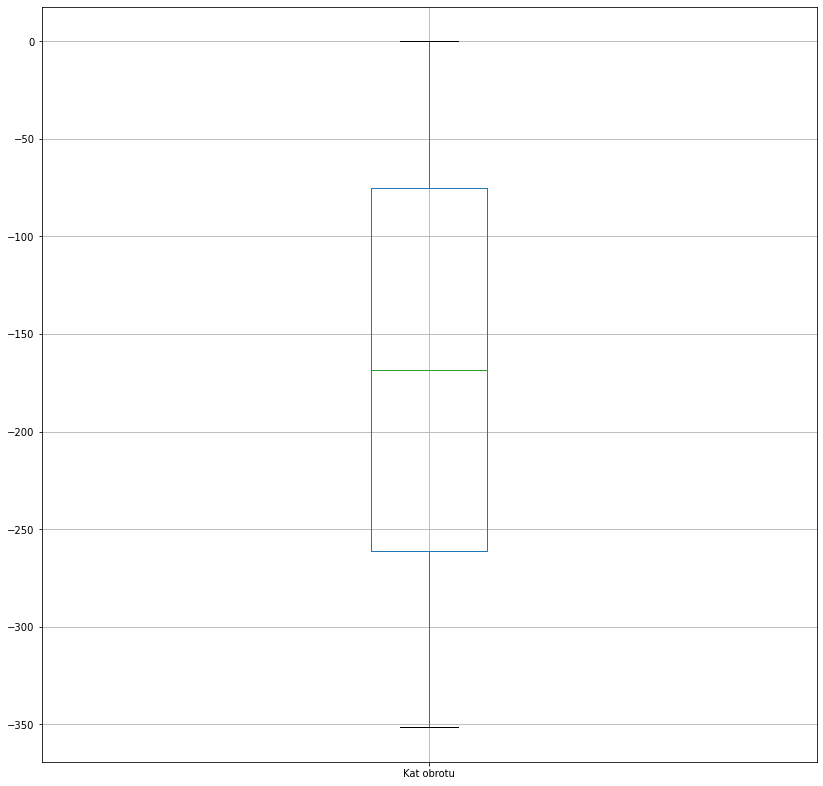

In [13]:
df.boxplot(column=['Kat obrotu'])
print('Maximum angle value: ')
print(df['Kat obrotu'].max())
print('Minimum angle value: ')
print(df['Kat obrotu'].min())

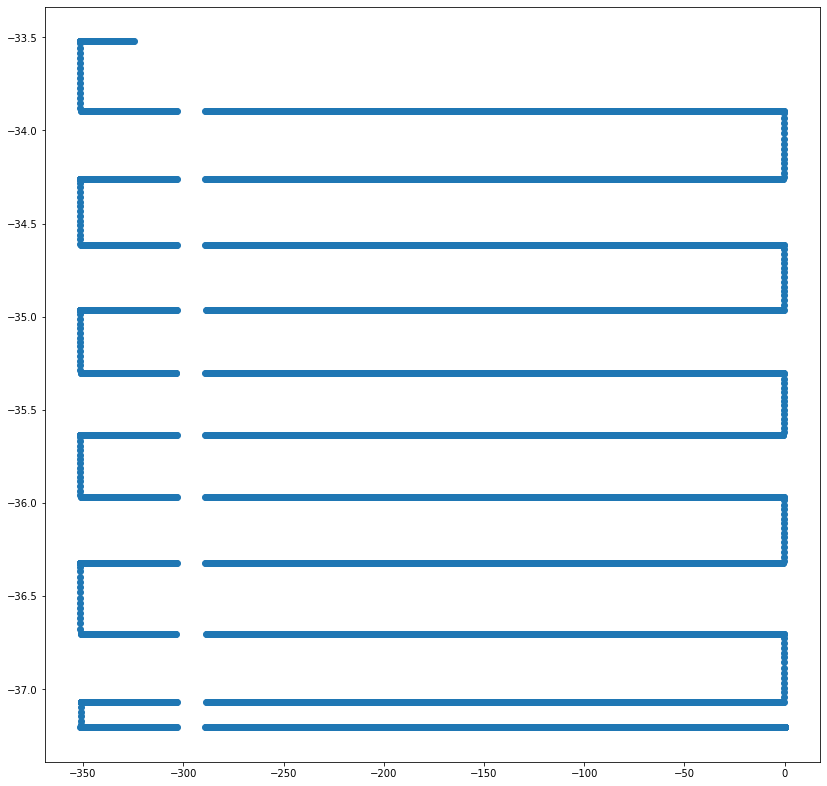

In [14]:

angles = angle[:10000]
zs = z[:10000]
cs = count[:2000]


plt.scatter(angles, zs)
plt.show()

## 3D plotting


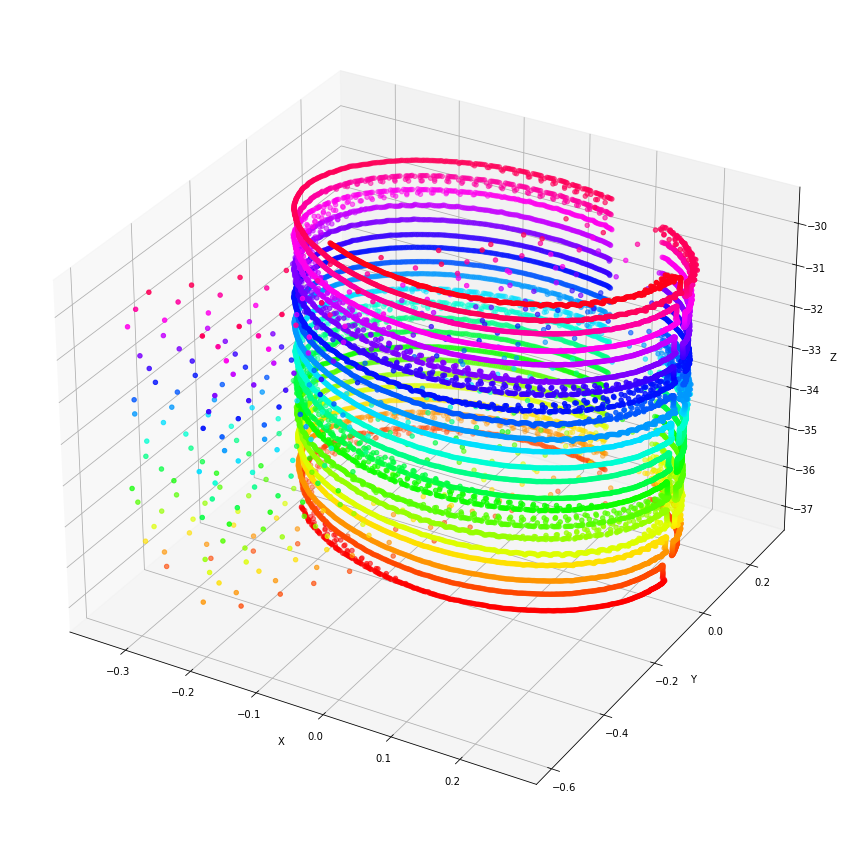

In [15]:

plt.figure(figsize=(1100*px, 1100*px))

ax = plt.axes(projection ='3d')



xs = x[1500: 20000]
ys = y[1500: 20000]
zs = z[1500: 20000]
angles = angle[1000: 5000]/100
cs = count[1000: 5000]


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(xs, ys, zs, c=zs, cmap='hsv')


plt.show()

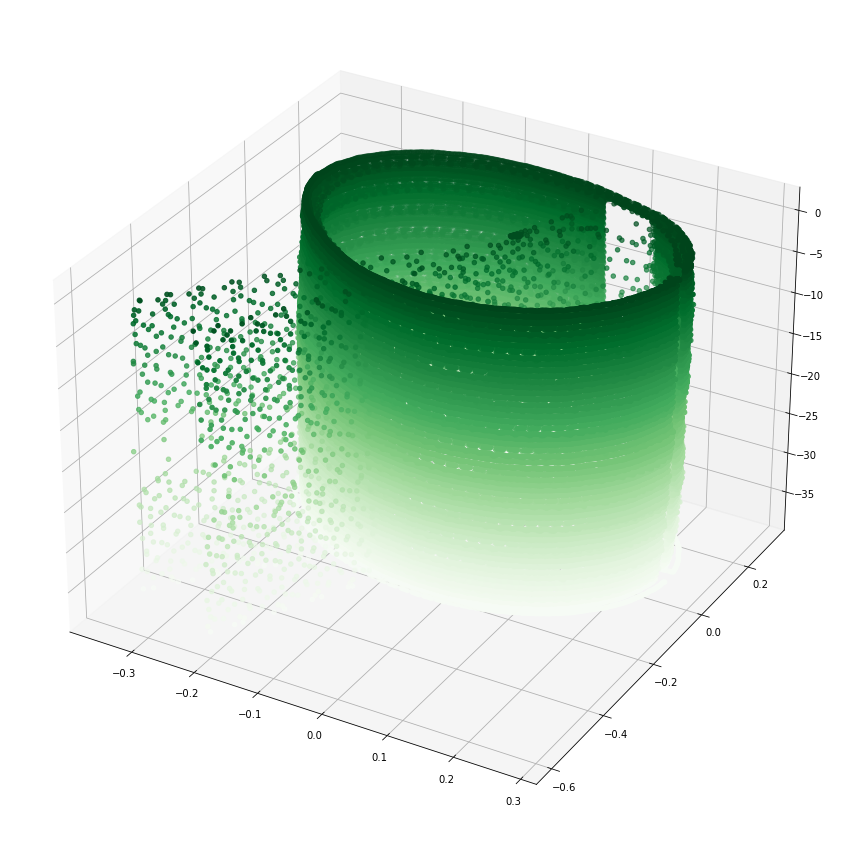

In [16]:
plt.figure(figsize=(1100*px, 1100*px))
ax = plt.axes(projection ='3d')

x = df['obl X']
y = df['obl Y']
z = df['Odczyt Z']
ax.scatter3D(x, y, z, c=z, cmap='Greens')
plt.show()

# z_points = 15 * np.random.random(100)
# x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
# y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
# ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')

In [17]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Scatter3d(
    x=x, 
    y=y, 
    z=z, 
    # mode='markers',
    marker=dict(
        size=2,
        color=z,  # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8,
    ),
)])

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.show()

In [18]:
# from cylinder_fitting import fit

# xx = xs.to_numpy()
# yy = ys.to_numpy()
# zz = zs.to_numpy()

# points = np.array([xx,yy,zz]) 


# points = np.transpose(points)

# w_fit, C_fit, r_fit, fit_err = fit(points)

In [19]:
import pyransac3d as pyrsc 

xx = xs.to_numpy()
yy = ys.to_numpy()
zz = zs.to_numpy()

points = np.array([xx,yy,zz]) 
points = np.transpose(points)

cylinder = pyrsc.Cylinder()
center, axis, radius, inliers = cylinder.fit(np.array(points), thresh=0.1, maxIteration=100)

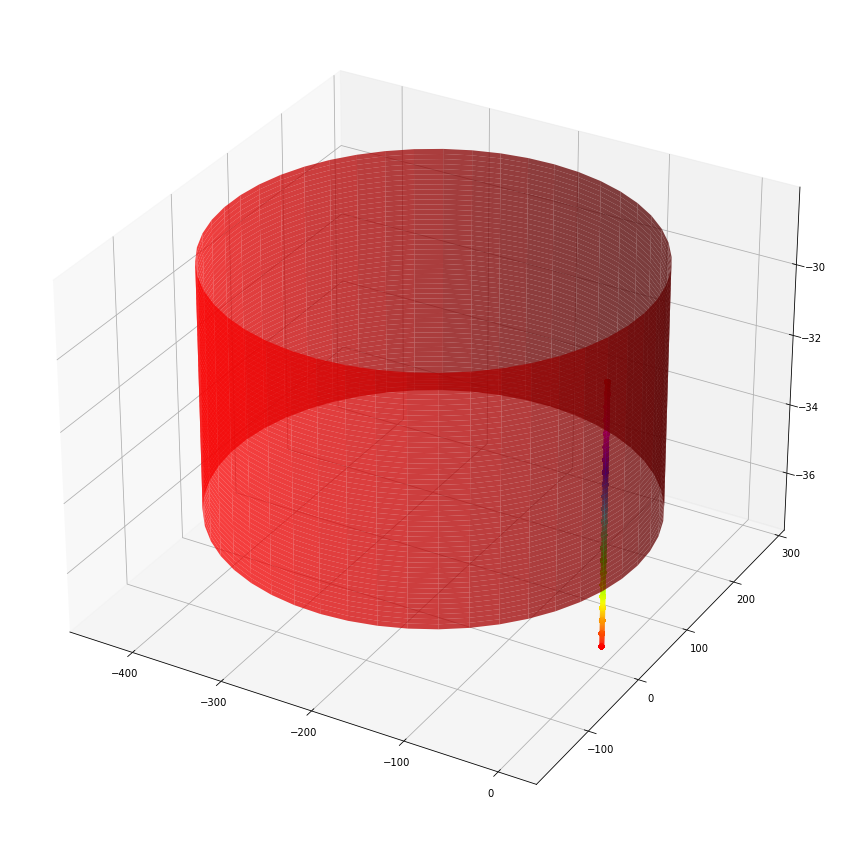

In [20]:
plt.figure(figsize=(1100*px, 1100*px))
ax = plt.axes(projection ='3d')


def data_for_cylinder_along_z(center_x, center_y, center_z, radius, height_z):
        z = np.linspace(center_z, center_z + height_z, 50)
        theta = np.linspace(0, 2 * np.pi, 50)
        theta_grid, z_grid = np.meshgrid(theta, z)
        x_grid = radius * np.cos(theta_grid) + center_x
        y_grid = radius * np.sin(theta_grid) + center_y
        return x_grid, y_grid, z_grid
Xc, Yc, Zc = data_for_cylinder_along_z(center[0], center[1], center[2], radius, 7) 
ax.plot_surface(Xc, Yc, Zc, color='red', alpha=0.75)
ax.scatter3D(xs, ys, zs, c=zs, cmap='hsv')
plt.show()
